In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.path.append("../")

from tqdm import tqdm_notebook
from src import NesterovMUFunc, Nesterov


In [76]:
class NesterovMUFuncEnemy(NesterovMUFunc):

    def estimation_grad(self, x, direction_point, x_star):
        g = self.grad(x)
        size = self.alpha * np.linalg.norm(g)
        diff = direction_point - x_star
        noise = diff / np.linalg.norm(diff) * size
        est = g - noise
        return est

    # def make_noise(self, x):
    #     noise = np.random.randn(self.d)
    #     g = self.grad(x)
    #     return np.linalg.norm(g) * self.alpha * noise / np.linalg.norm(noise)

    # def estimation_grad(self, x, *args, **kwargs):
    #     return self.grad(x) + self.make_noise(x)


In [77]:
def plot(iters: int = 100, alphas = (), mu = 1, L = 10):
    d = 1001
    start = np.zeros(d)
    start[0] = 1000
    
    with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
        plt.figure(figsize=(20, 8), dpi=120)
        for j, alpha in enumerate(alphas):
            nesterov = NesterovMUFuncEnemy(L=L, mu=mu, alpha=alpha, d=d)
            heavy = Nesterov(start=start, L=L, mu=mu, func=nesterov)
            nesterov_true = NesterovMUFuncEnemy(L=L, mu=mu, alpha=0, d=d)
            heavy_true = Nesterov(start=start, L=L, mu=mu, func=nesterov_true)
            for _ in tqdm_notebook(range(iters)):
                heavy.step()
                heavy_true.step()
            plt.subplot(1, 3, j + 1)
            xs = heavy.history
            xst = heavy_true.history
            values = [nesterov(x) for x in xs]
            plt.semilogy(np.arange(len(xs)), values, label="Noised")
            plt.semilogy(np.arange(len(xs)), [nesterov(x) for x in xst], label="Real")
            plt.xlabel(r"Iterations $N$")
            plt.ylabel(r"$f(x^N) - f^*$")
            plt.title(fr"$\alpha$ = {alpha:.3f}")
            plt.legend()
        plt.suptitle(fr"Dimension - {d}, L - {L}, $\mu$ - {mu}")
        plt.show()
    return xs

Step 0.1, ak 0.31622776601683794, mu 1, L 10, m 1, s 1, u step 0.31622776601683794
Step 0.1, ak 0.31622776601683794, mu 1, L 10, m 1, s 1, u step 0.31622776601683794


/tmp/ipykernel_82137/3067518071.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(iters)):


  0%|          | 0/30 [00:00<?, ?it/s]

Step 0.5196152422706632, ak nan, mu 1, L 10, m 0.0, s 2.5, u step nan
Step 0.1, ak 0.31622776601683794, mu 1, L 10, m 1, s 1, u step 0.31622776601683794


  0%|          | 0/30 [00:00<?, ?it/s]

Step 0.5409676573889565, ak 0.0030433207324986862, mu 1, L 10, m -0.020000000000000018, s 2.5402, u step 0.0030433207324986862
Step 0.1, ak 0.31622776601683794, mu 1, L 10, m 1, s 1, u step 0.31622776601683794


  0%|          | 0/30 [00:00<?, ?it/s]

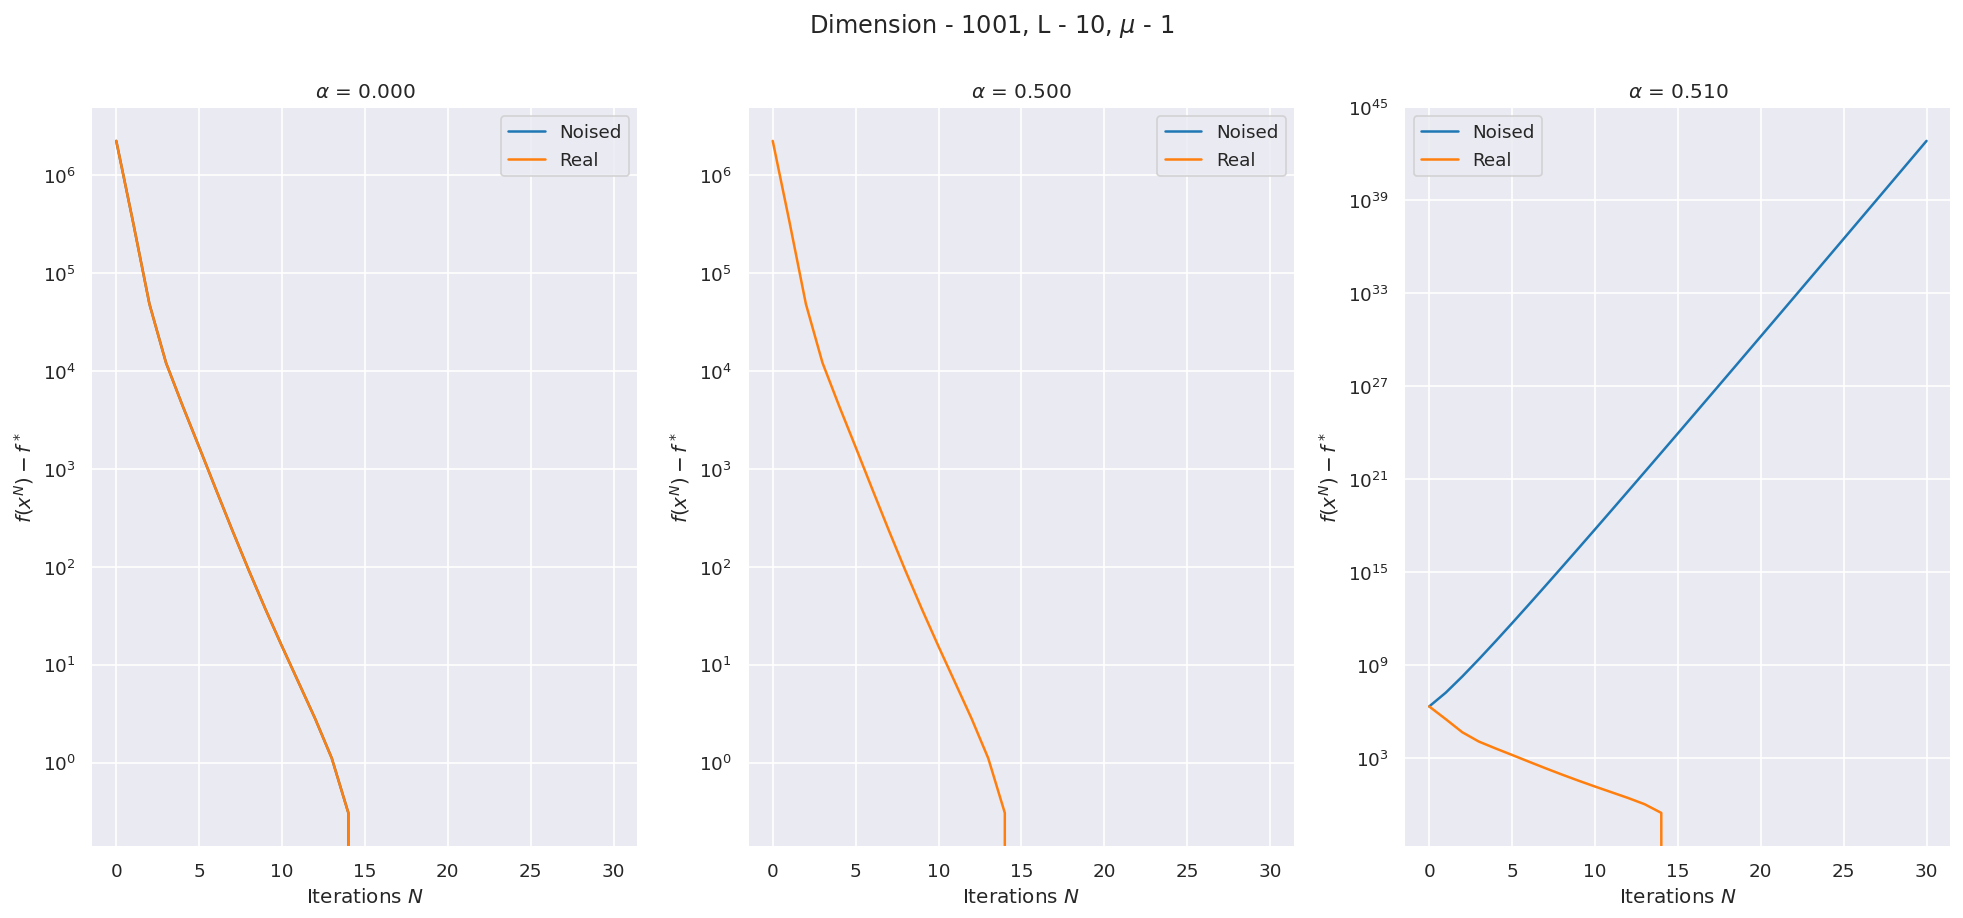

In [86]:
_ = plot(30, alphas=[0, 0.5, 0.51], mu = 1, L = 10)

Step 0.01, ak 0.1, mu 1, L 100, m 1, s 1, u step 0.1
Step 0.01, ak 0.1, mu 1, L 100, m 1, s 1, u step 0.1


/tmp/ipykernel_82137/3067518071.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(iters)):


  0%|          | 0/100 [00:00<?, ?it/s]

Step 0.05196152422706632, ak nan, mu 1, L 100, m 0.0, s 2.5, u step nan
Step 0.01, ak 0.1, mu 1, L 100, m 1, s 1, u step 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

Step 0.054096765738895644, ak 0.00030432556152870633, mu 1, L 100, m -0.020000000000000018, s 2.5402, u step 0.00030432556152870633
Step 0.01, ak 0.1, mu 1, L 100, m 1, s 1, u step 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

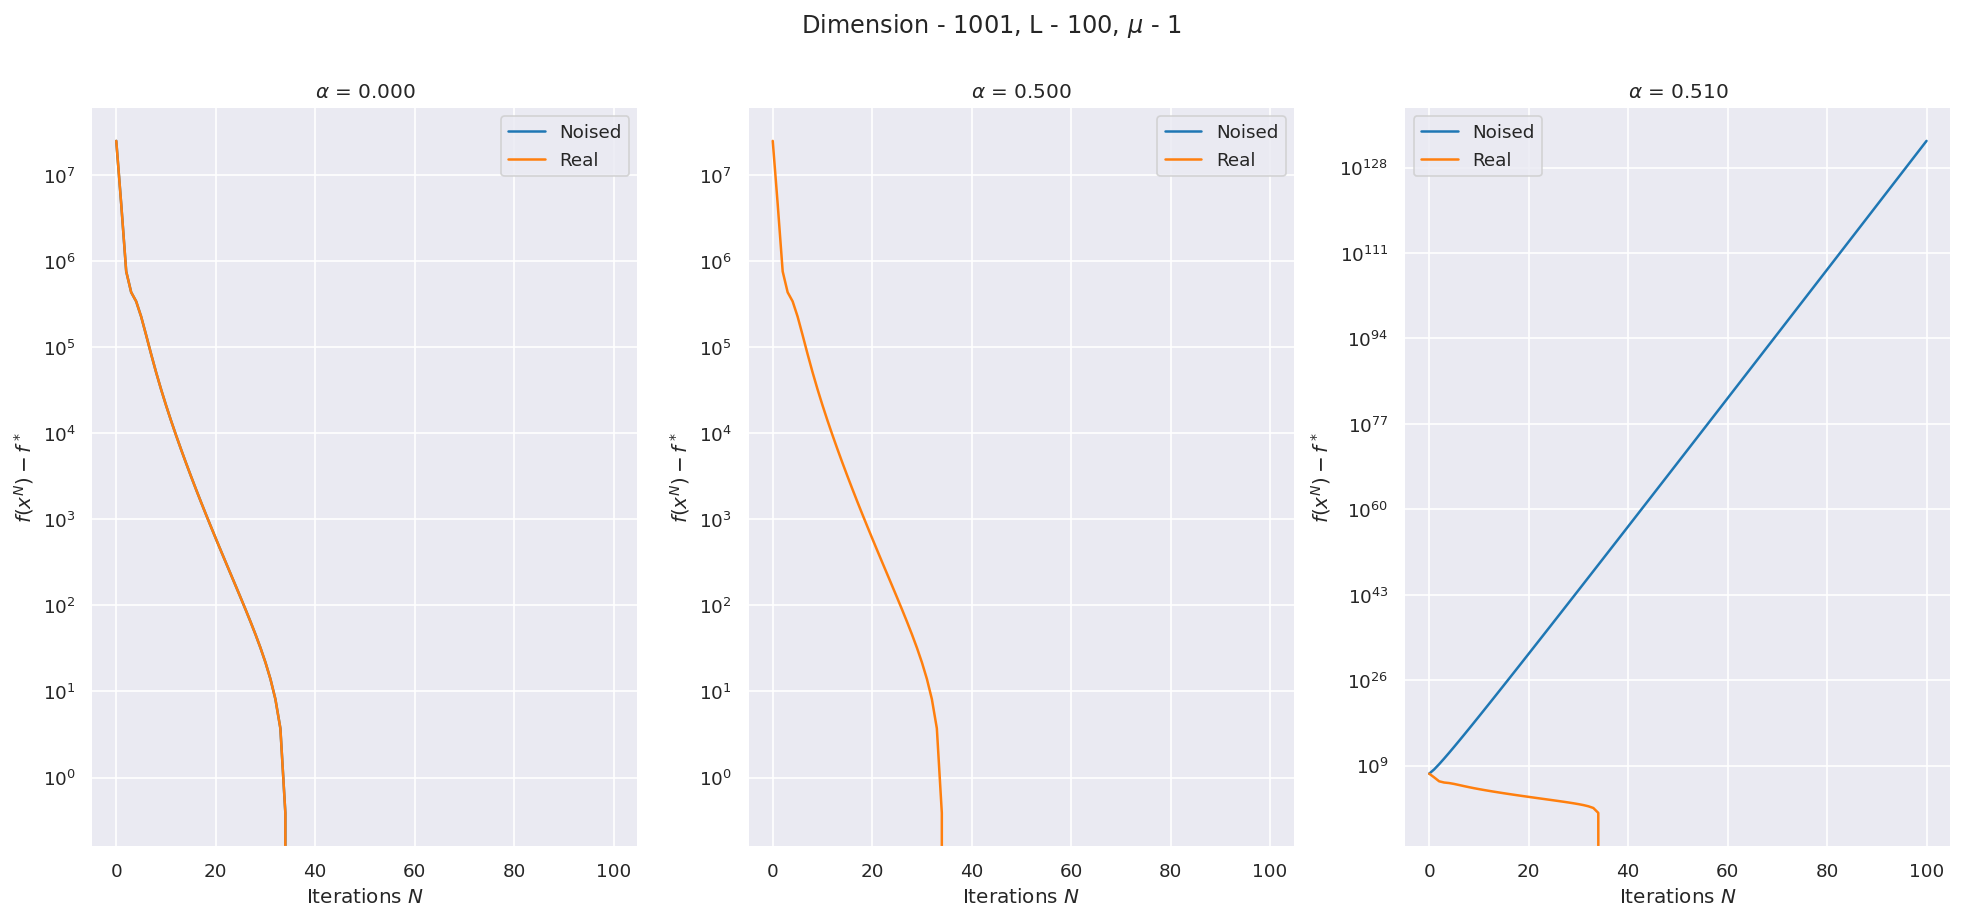

In [84]:
_ = plot(100, alphas=[0, 0.5, 0.51], mu = 1, L = 100)

Step 0.01, ak 0.03162277660168379, mu 0.1, L 100, m 1, s 1, u step 0.3162277660168379
Step 0.01, ak 0.03162277660168379, mu 0.1, L 100, m 1, s 1, u step 0.3162277660168379


/tmp/ipykernel_82137/3067518071.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(iters)):


  0%|          | 0/100 [00:00<?, ?it/s]

Step 0.05196152422706632, ak nan, mu 0.1, L 100, m 0.0, s 2.5, u step nan
Step 0.01, ak 0.03162277660168379, mu 0.1, L 100, m 1, s 1, u step 0.3162277660168379


  0%|          | 0/100 [00:00<?, ?it/s]

Step 0.054096765738895644, ak 3.043249103829024e-05, mu 0.1, L 100, m -0.020000000000000018, s 2.5402, u step 0.0003043249103829024
Step 0.01, ak 0.03162277660168379, mu 0.1, L 100, m 1, s 1, u step 0.3162277660168379


  0%|          | 0/100 [00:00<?, ?it/s]

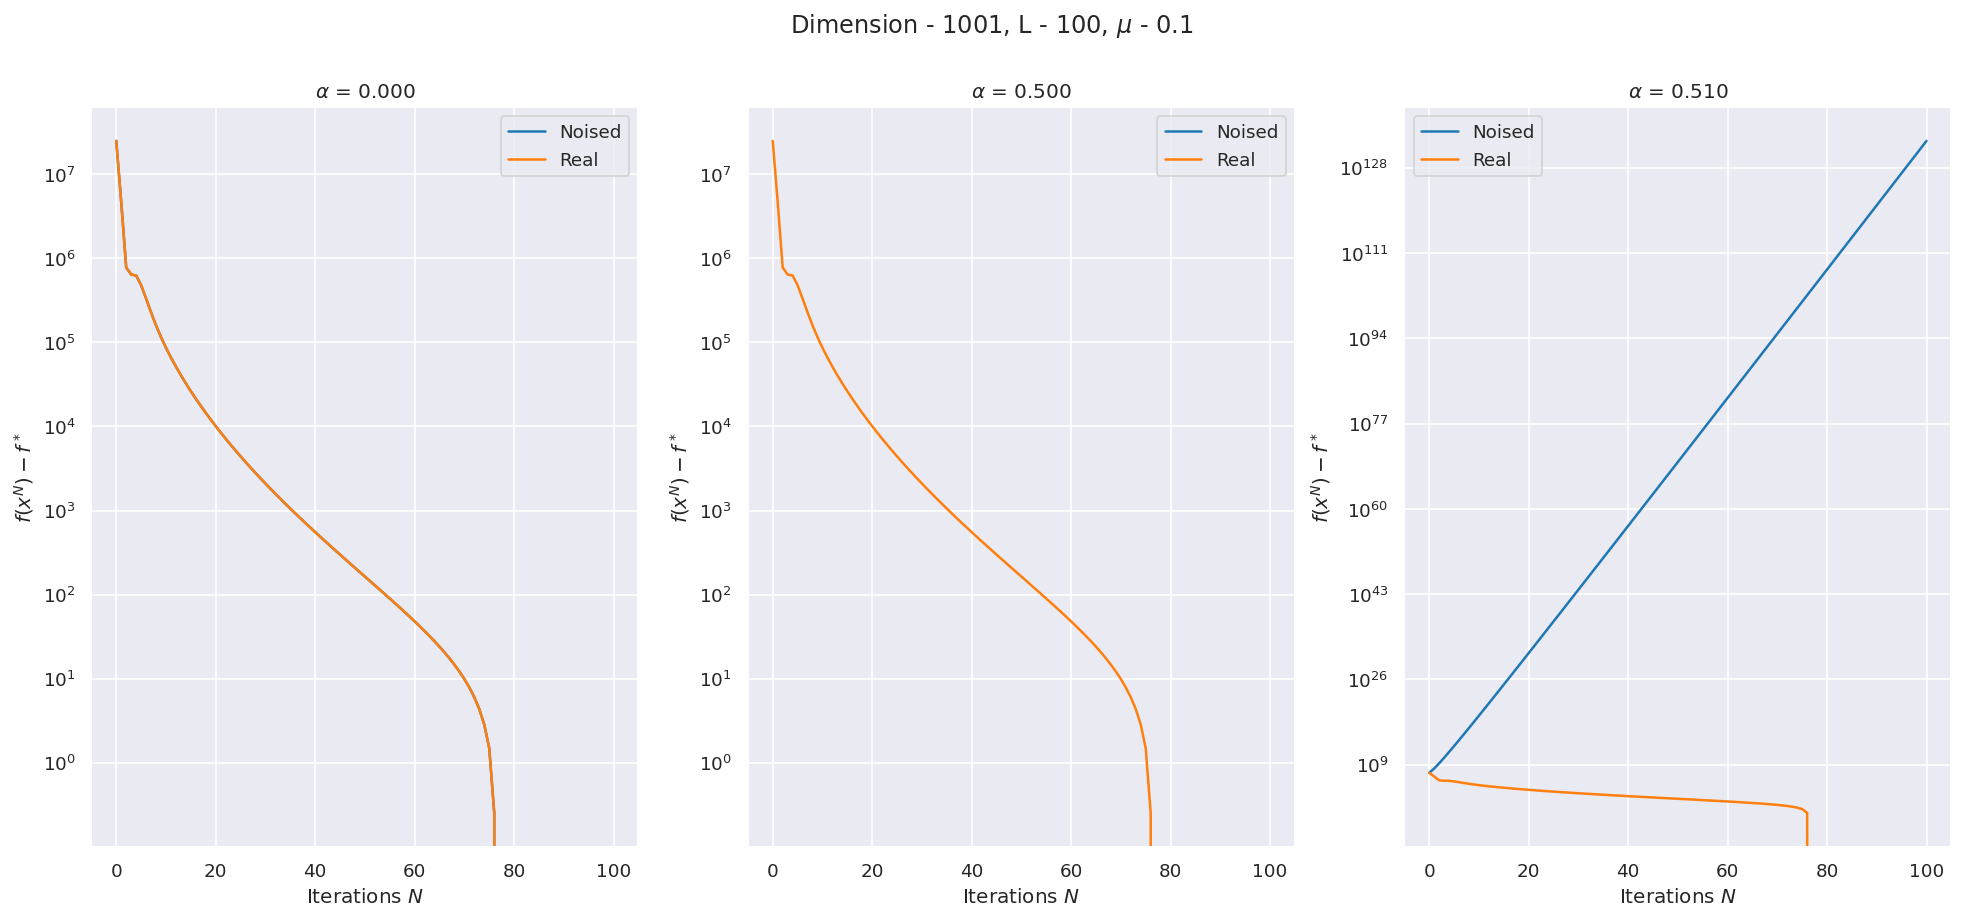

In [82]:
_ = plot(100, alphas=[0, 0.5, 0.51], mu = 0.1, L = 100)